# Menghitung Tingkat Pengembalian dan Resiko dari SAHAM

Penerapan perhitungan risk dan return menggunakan Rate of Return (ROR) dan Standar Deviasi (std) sebagai landasan untuk memilih instrument investasi saham. 

In [2]:
# 1. Category Encoders
# Install Category Encoders
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 760 kB/s 


In [3]:
# Import Library for Data Manipulation
import pandas as pd 
import category_encoders as ce


# Import Library for Machine Learning
import sklearn.metrics as metrics 

# Import Library for Visualization
import matplotlib. pyplot as plt
import seaborn as sns 
import numpy as np; np.random.seed(0) 

Pada percobaan kali ini saya menggunakan dataset saham PT Kalbe Farma Tbk. dengan kode saham KLBF.JK periode 1 Januari 2020 sampai 31 Desember 2021 yang saya peroleh melalui Yahoo Finance

In [4]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving KLB.JK.csv to KLB.JK.csv


In [6]:
# open dataframe
kalbe = pd.read_csv('KLB.JK.csv', sep = ',')
# Prints the Dataset Information
kalbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       489 non-null    object 
 1   Open       489 non-null    float64
 2   High       489 non-null    float64
 3   Low        489 non-null    float64
 4   Close      489 non-null    float64
 5   Adj Close  489 non-null    float64
 6   Volume     489 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 26.9+ KB


Untuk melihat tingkat pengembalian kita hanya membutuhkan kolom Tanggal (Date) dan Harga penutupan saja (Close) Oleh karena itu pada data frame dibawah kita hanya ambil dua kolom tersebut.

In [7]:
kalbe = kalbe[['Date', 'Close']]
kalbe = kalbe.sort_values(by = ['Date'])
kalbe

,Date,Close
0,2020-01-02,1615.0
1,2020-01-03,1635.0
2,2020-01-06,1640.0
3,2020-01-07,1635.0
4,2020-01-08,1585.0
...,...,...
484,2021-12-24,1575.0
485,2021-12-27,1610.0
486,2021-12-28,1605.0
487,2021-12-29,1615.0


# Visualisasi Pergerakan Data Harga Saham Dalam Setahun



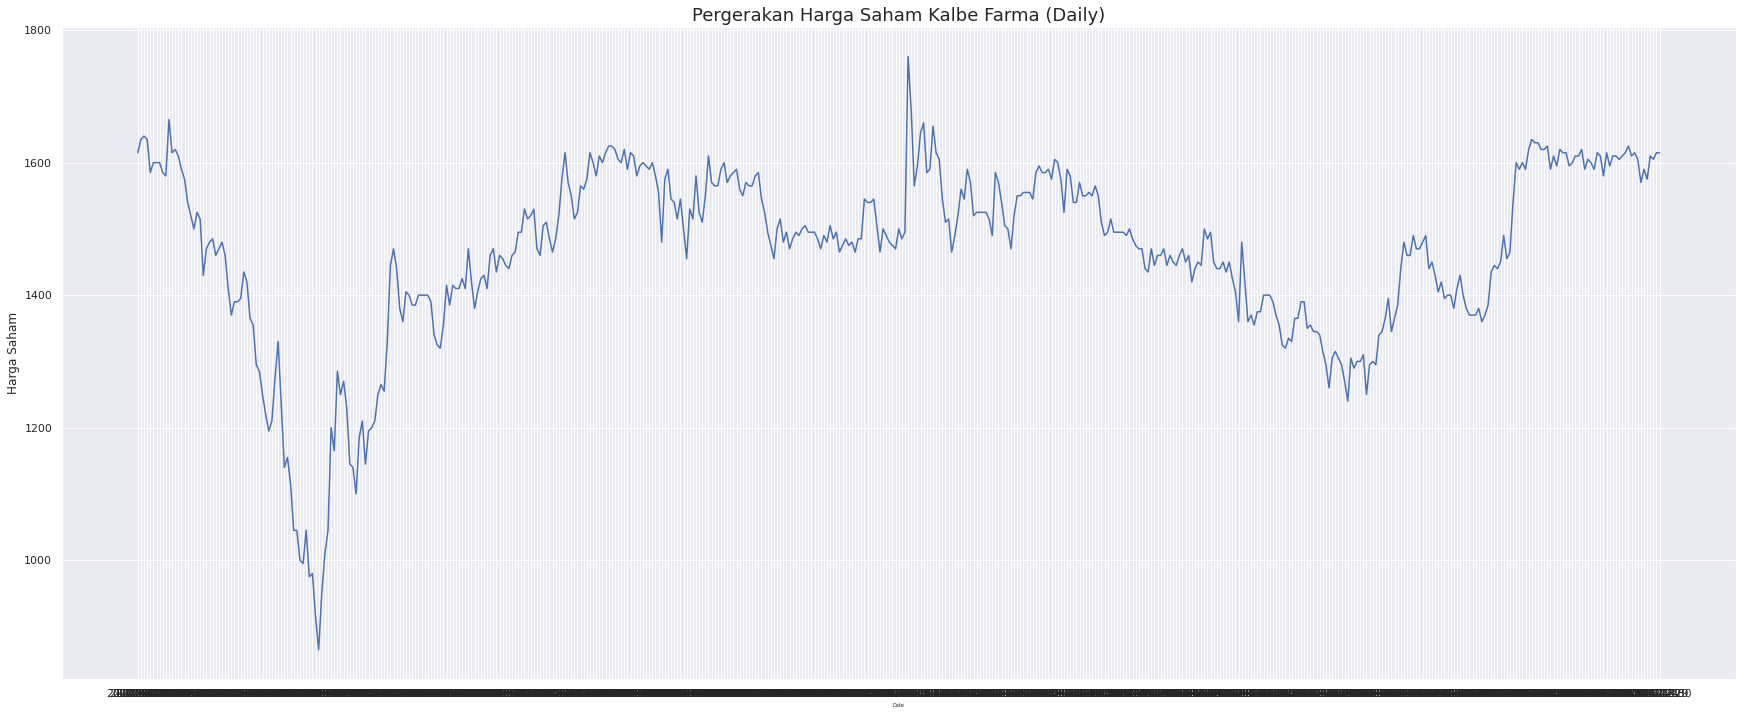

In [30]:
plt.rcParams['figure.figsize'] = 30, 12
sns.lineplot(data=kalbe, x='Date', y='Close')
plt.title("Pergerakan Harga Saham Kalbe Farma (Daily)", fontsize = 18)
plt.xlabel('Date',fontsize = 5)
plt.ylabel('Harga Saham')
plt.show()

**Tingkat pengembalian /return saham Kalbe Farma**

Untuk menghitung tingkat pengembalian saham kita menggunakan rumus = (P1-P0) / P0

In [71]:
kalbe_daily =  ((kalbe['Close']-kalbe['Close'].shift(1)) / kalbe['Close'].shift(1)).mul(100)

In [49]:
kalbe_daily

0           NaN
1      1.238390
2      0.305810
3     -0.304878
4     -3.058104
         ...   
484   -0.943396
485    2.222222
486   -0.310559
487    0.623053
488    0.000000
Name: Close, Length: 489, dtype: float64

Sekarang kita akan melihat bagaimana data kita jika di deskripsikan 

In [53]:
# Prints Descriptive Statistics
kalbe_daily.describe().transpose()

count    488.000000
mean       0.031697
std        2.546607
min       -7.692308
25%       -1.261868
50%        0.000000
75%        0.975806
max       17.725753
Name: Close, dtype: float64



*   Rata-rata tingkat pengembaliannya yaitu 0,03 %
*   Tingkat loss terbesar yaitu -7,69%
*   Return paling tinggi yaitu 17.7%


VISUALISASI TINGKAT PENGEMBALIAN (RETURN) SAHAM KALBE

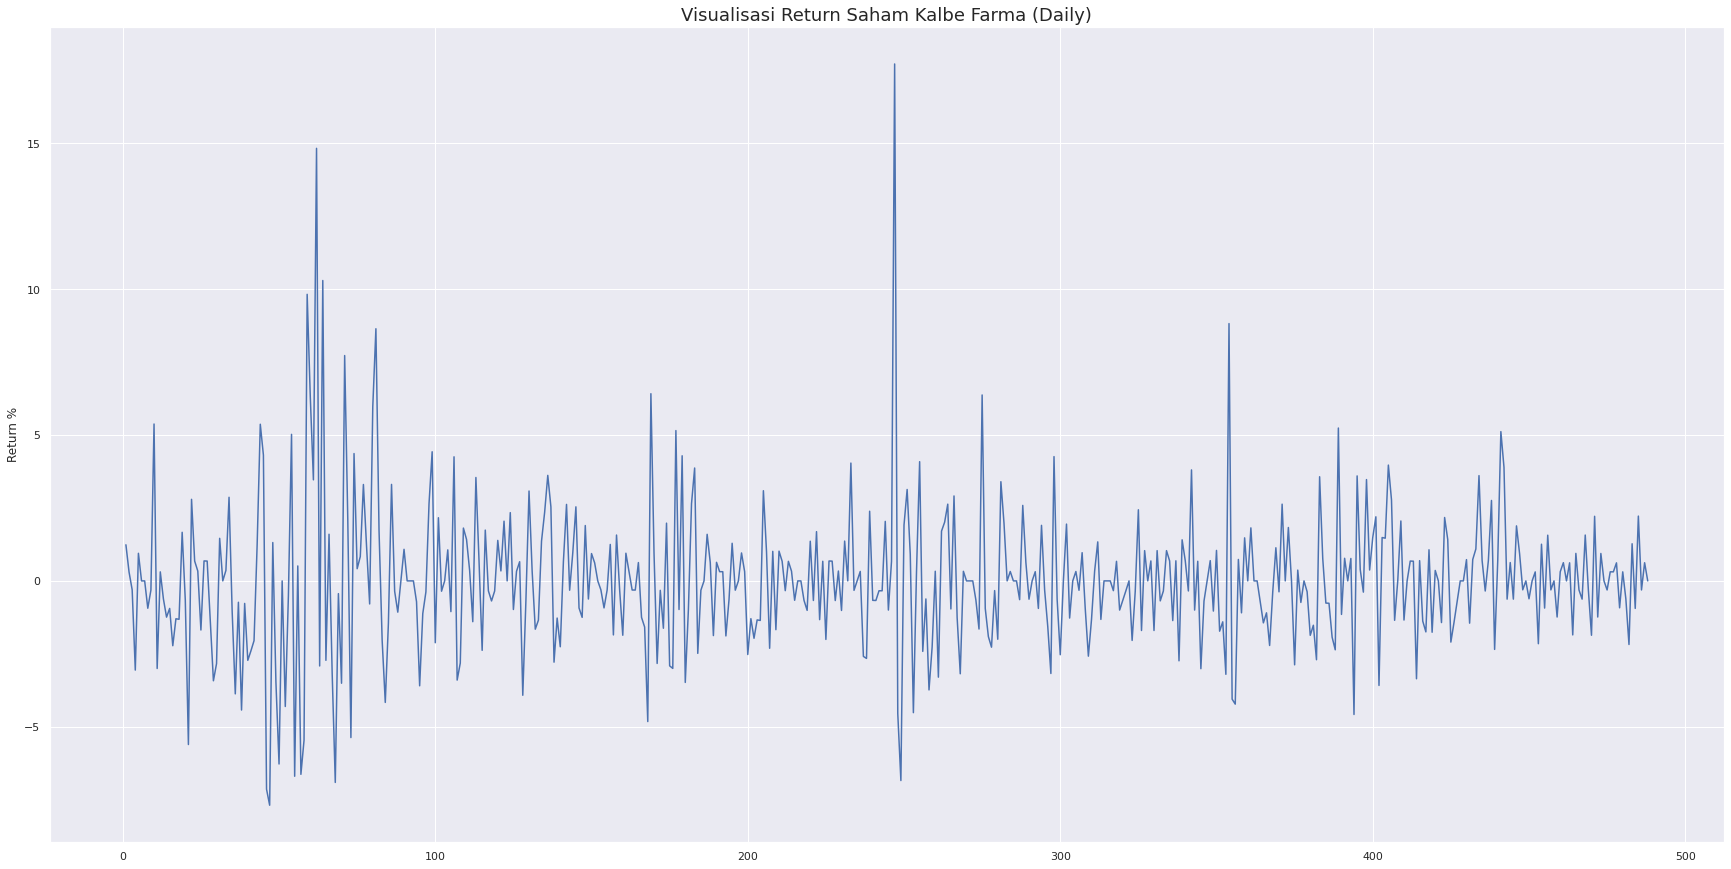

In [75]:
kalbe_daily.plot(figsize=(30,15))
plt.title("Visualisasi Return Saham Kalbe Farma (Daily)", fontsize = 18)
plt.ylabel ("Return %")
plt.show()

Average Return

In [56]:
kalbe_daily_mean = kalbe_daily.mean()
kalbe_daily_mean

0.031697203682444275

Frekuensi daily return

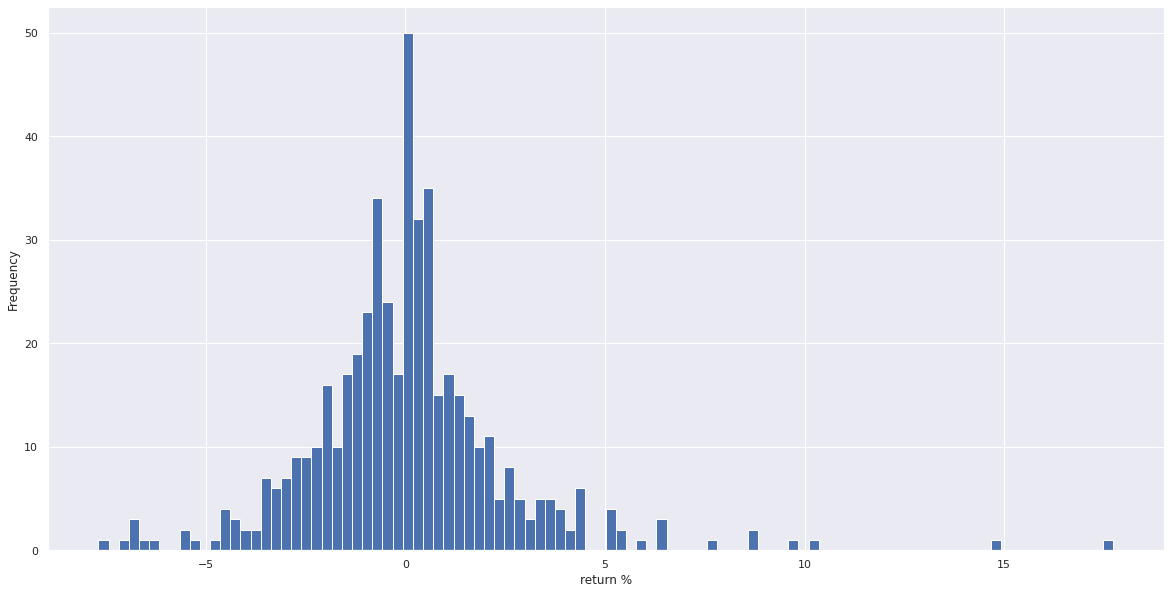

In [66]:
kalbe_daily.plot(kind = 'hist', figsize = (20,10), bins = 100)
plt.xlabel('return %')
plt.show()

*Rate Of Return Tahunan*

In [67]:
kalbe_daily_mean*252

7.987695327975957

# STANDAR DEVIASI

In [69]:
kalbe_std_daily = kalbe_daily.std()
kalbe_std_daily

2.546606573128281

Dari perhitungan diatas, saham kalbe selama 1 Januari 2020 sampai 31 Desember 2021 memiliki rata-rata Rate of Return 2.54 %

Kesimpulan

Berdasar perhitungan ROR dan standar deviasi saham Kalbe ,dapat diekspetasikan bahwa dalam tahun mendatang kalbe akan menghasikan return sekitar 7.9% namun hal ini bisa saja meleset sebesar nilai standart deviasinya yaitu +/- 2.54%.